# KMeans实现数据聚类

In [1]:
#数据加载
import pandas as pd
import numpy as np
data = pd.read_csv('task1_data1.csv')
data_result = pd.read_csv('task1_data2.csv')
data.head()
# data_result.head()

,x1,x2,y
0,82.5302,67.9939,0.0
1,14.3821,54.6641,NaN
2,88.9239,14.9664,NaN
3,78.0811,26.0769,NaN
4,78.1597,58.6068,NaN


In [2]:
#获取唯一一个有标签的数据点 命名为X_labeled
X_labeled = data.iloc[0,:]
print(X_labeled)
print(type(X_labeled))

x1    82.5302
x2    67.9939
y      0.0000
Name: 0, dtype: float64
<class 'pandas.core.series.Series'>


In [3]:
#X 赋值
X = data.drop(['y'],axis=1)
X.head()

,x1,x2
0,82.5302,67.9939
1,14.3821,54.6641
2,88.9239,14.9664
3,78.0811,26.0769
4,78.1597,58.6068


In [4]:
#正确结果的赋值
y = data_result.loc[:,'y']
y.head()

0    0
1    1
2    0
3    0
4    0
Name: y, dtype: int64

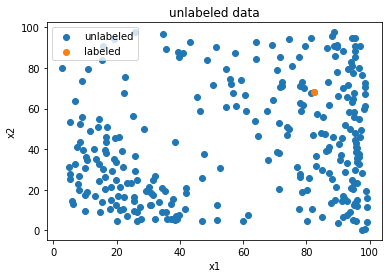

In [5]:
#数据可视化
from matplotlib import pyplot as plt
fig1 = plt.figure()
plt.scatter(X.loc[:,'x1'],X.loc[:,'x2'],label='unlabeled')
plt.scatter(X_labeled['x1'],X_labeled['x2'],label='labeled')
plt.title('unlabeled data')
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend(loc='upper left')
plt.show()

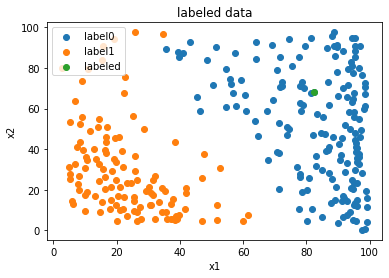

In [6]:
fig2 = plt.figure()
plt.scatter(X.loc[:,'x1'][y==0],X.loc[:,'x2'][y==0],label='label0')
plt.scatter(X.loc[:,'x1'][y==1],X.loc[:,'x2'][y==1],label='label1')
plt.scatter(X_labeled['x1'],X_labeled['x2'],label='labeled')
plt.title('labeled data')
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend(loc='upper left')
plt.show() 

In [7]:
#建立KMeans模型并训练
from sklearn.cluster import KMeans
KM = KMeans(n_clusters=2,init='random',random_state=0)
#训练
KM.fit(X)

KMeans(init='random', n_clusters=2, random_state=0)

In [8]:
#查看聚类中心
centers = KM.cluster_centers_
print(centers)

[[82.88964583 52.50966869]
 [23.23572487 28.61664752]]


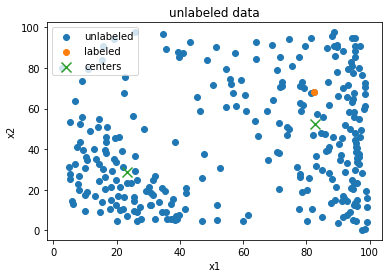

In [9]:
fig3 = plt.figure()
plt.scatter(X.loc[:,'x1'],X.loc[:,'x2'],label='unlabeled')
plt.scatter(X_labeled['x1'],X_labeled['x2'],label='labeled')

plt.scatter(centers[:,0],centers[:,1],100,marker='x',label='centers')

plt.title('unlabeled data')
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend(loc='upper left')
plt.show()

In [10]:
#无监督聚类结果预测
y_predict = KM.predict(X)
print(y_predict)
print(pd.value_counts(y_predict))
print(pd.value_counts(y))

[0 1 0 0 0 0 1 1 1 0 0 0 0 0 1 1 0 1 1 0 0 0 0 0 1 1 1 0 1 0 0 1 0 0 1 0 1
 0 0 0 1 1 0 0 0 1 1 0 0 1 0 1 0 0 1 1 1 1 0 1 0 0 0 1 0 1 1 1 1 0 0 0 1 1
 0 1 0 0 0 0 0 0 0 1 1 0 1 0 1 1 0 0 0 1 1 0 0 0 0 0 1 1 0 0 0 1 1 0 1 1 0
 1 1 0 0 0 1 0 0 1 0 0 0 1 1 1 1 1 1 1 1 0 0 1 1 0 0 1 1 1 1 1 0 0 1 1 0 1
 1 1 1 1 1 1 0 0 0 1 1 1 0 0 0 0 1 1 1 0 1 1 0 1 0 0 1 1 1 0 0 0 0 1 0 0 1
 1 0 1 0 1 0 0 0 0 1 0 0 0 1 1 0 0 1 0 0 0 1 0 1 0 0 0 0 1 1 1 0 1 0 1 1 0
 1 0 1 0 0 0 0 0 0 1 1 1 1 0 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
0    168
1    117
dtype: int64
0    167
1    118
Name: y, dtype: int64


In [11]:
#准确率计算
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y,y_predict)
print(accuracy)

0.9964912280701754


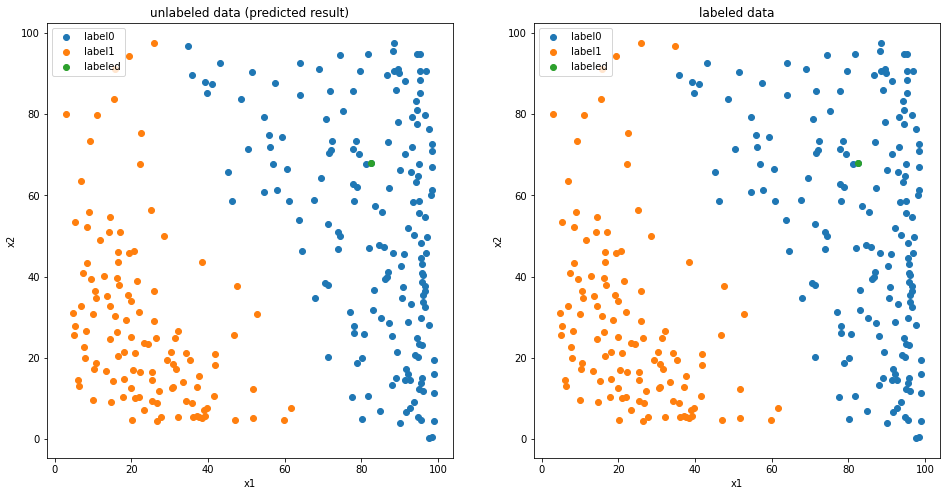

In [12]:
fig4 = plt.figure(figsize=(16,8))

fig5=plt.subplot(121)
plt.scatter(X.loc[:,'x1'][y_predict==0],X.loc[:,'x2'][y_predict==0],label='label0')
plt.scatter(X.loc[:,'x1'][y_predict==1],X.loc[:,'x2'][y_predict==1],label='label1')
plt.scatter(X_labeled['x1'],X_labeled['x2'],label='labeled')
plt.title('unlabeled data (predicted result)')
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend(loc='upper left')

fig6=plt.subplot(122)
plt.scatter(X.loc[:,'x1'][y==0],X.loc[:,'x2'][y==0],label='label0')
plt.scatter(X.loc[:,'x1'][y==1],X.loc[:,'x2'][y==1],label='label1')
plt.scatter(X_labeled['x1'],X_labeled['x2'],label='labeled')
plt.title('labeled data')
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend(loc='upper left')
plt.show() 

In [13]:
#查看第一个带有正确结果标签的样本点的标签
print(X_labeled)
print(y_predict[0])

x1    82.5302
x2    67.9939
y      0.0000
Name: 0, dtype: float64
0


In [14]:
#结果矫正
y_corrected = []
for i in y_predict:
    if i==0:
        y_corrected.append(1)
    elif i==1:
        y_corrected.append(0)
print(y_corrected)
print(y_predict)
print(pd.value_counts(y_corrected))
print(pd.value_counts(y))

[1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
[0 1 0 0 0 0 1 1 1 0 0 0 0 0 1 1 0 1 1 0 0 0 0 0 1 1 1 0 1 0 0 1 0 0 1 0 1
 0 0 0 1 1 0 0 0 1 1 0 0 1 0 1 0 0 1 1 1 1 0 1 0 0 0 1 0 1 1 1 1 0 0 

In [15]:
accuracy_corrected = accuracy_score(y,y_corrected)
print(accuracy_corrected)

0.0035087719298245615


In [16]:
y_corrected = np.array(y_corrected)
print(type(y_corrected))

<class 'numpy.ndarray'>


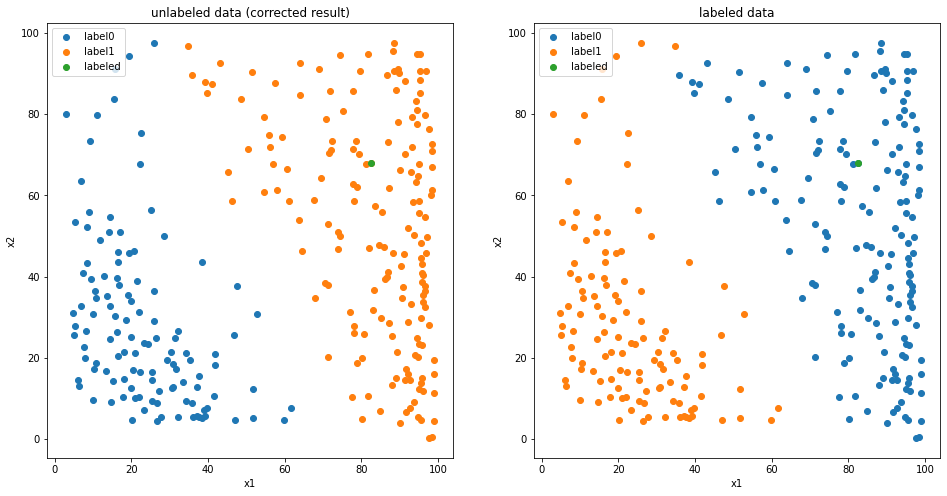

In [17]:
fig8 = plt.figure(figsize=(16,8))

fig9=plt.subplot(121)
plt.scatter(X.loc[:,'x1'][y_corrected==0],X.loc[:,'x2'][y_corrected==0],label='label0')
plt.scatter(X.loc[:,'x1'][y_corrected==1],X.loc[:,'x2'][y_corrected==1],label='label1')
plt.scatter(X_labeled['x1'],X_labeled['x2'],label='labeled')
plt.title('unlabeled data (corrected result)')
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend(loc='upper left')

fig10=plt.subplot(122)
plt.scatter(X.loc[:,'x1'][y==0],X.loc[:,'x2'][y==0],label='label0')
plt.scatter(X.loc[:,'x1'][y==1],X.loc[:,'x2'][y==1],label='label1')
plt.scatter(X_labeled['x1'],X_labeled['x2'],label='labeled')
plt.title('labeled data')
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend(loc='upper left')
plt.show() 

In [18]:
#knn建模部分 knn建模与训练
# print(X)
# print(y)
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier(n_neighbors=3)
KNN.fit(X,y)

KNeighborsClassifier(n_neighbors=3)

In [19]:
#knn预测
y_predict_knn = KNN.predict(X)
accuracy_knn = accuracy_score(y,y_predict_knn)
print(accuracy_knn)

1.0


In [20]:
#统计类别分布
print(pd.value_counts(y_predict_knn))
print(pd.value_counts(y))

0    167
1    118
dtype: int64
0    167
1    118
Name: y, dtype: int64


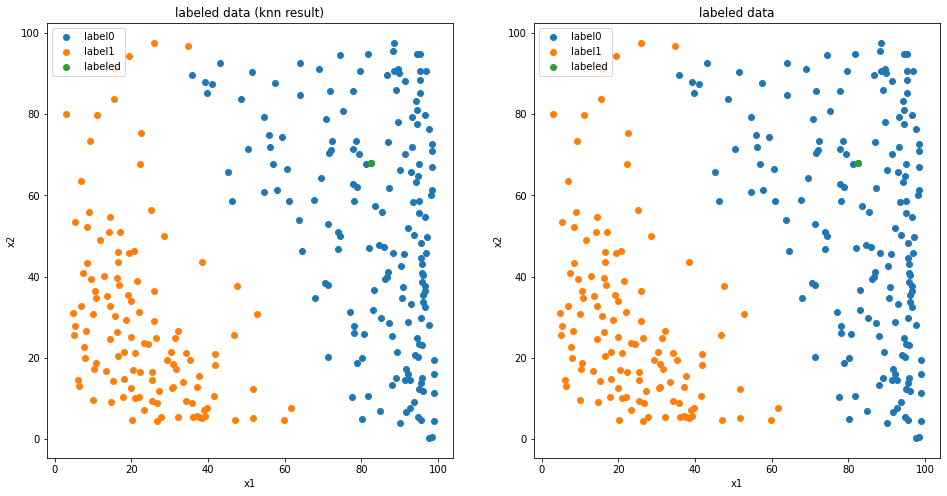

In [21]:
fig11 = plt.figure(figsize=(16,8))

fig12=plt.subplot(121)
plt.scatter(X.loc[:,'x1'][y_predict_knn==0],X.loc[:,'x2'][y_predict_knn==0],label='label0')
plt.scatter(X.loc[:,'x1'][y_predict_knn==1],X.loc[:,'x2'][y_predict_knn==1],label='label1')
plt.scatter(X_labeled['x1'],X_labeled['x2'],label='labeled')
plt.title('labeled data (knn result)')
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend(loc='upper left')

fig13=plt.subplot(122)
plt.scatter(X.loc[:,'x1'][y==0],X.loc[:,'x2'][y==0],label='label0')
plt.scatter(X.loc[:,'x1'][y==1],X.loc[:,'x2'][y==1],label='label1')
plt.scatter(X_labeled['x1'],X_labeled['x2'],label='labeled')
plt.title('labeled data')
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend(loc='upper left')
plt.show() 

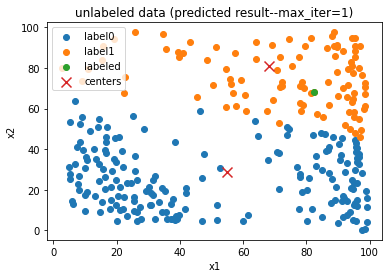

In [22]:
#KMeans迭代一次的结果
KM2 = KMeans(n_clusters=2,init='random',random_state=1,n_init=1,max_iter=1)
KM2.fit(X)
centers2 = KM2.cluster_centers_
y_predict2 = KM2.predict(X)


fig15 = plt.figure()
plt.scatter(X.loc[:,'x1'][y_predict2==0],X.loc[:,'x2'][y_predict2==0],label='label0')
plt.scatter(X.loc[:,'x1'][y_predict2==1],X.loc[:,'x2'][y_predict2==1],label='label1')
plt.scatter(X_labeled['x1'],X_labeled['x2'],label='labeled')
plt.scatter(centers2[:,0],centers2[:,1],100,marker='x',label='centers')

plt.title('unlabeled data (predicted result--max_iter=1)')
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend(loc='upper left')

FileNotFoundError: [Errno 2] No such file or directory: '2d_output/1.png'

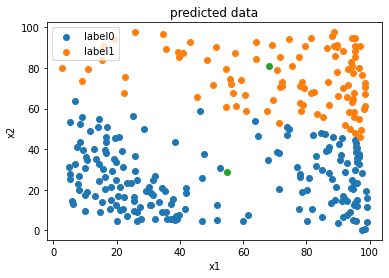

In [23]:
#逐步迭代查看KMeans模型训练效果
centers = np.array([[0,0,0,0]])
for i in range(1,10):
    KM = KMeans(n_clusters=2,random_state=1,init='random',n_init=1,max_iter=i)
    KM.fit(X)

    centers_i = KM.cluster_centers_
    centers_i_temp = centers_i.reshape(1,-1)
    centers = np.concatenate((centers,centers_i_temp),axis=0)
    #predict based on training data
    y_predict = KM.predict(X)

    #visualize the data and results
    fig_i = plt.figure()
    label0 = plt.scatter(X.loc[:,'x1'][y_predict==0],X.loc[:,'x2'][y_predict==0])
    label1 = plt.scatter(X.loc[:,'x1'][y_predict==1],X.loc[:,'x2'][y_predict==1])

    plt.title("predicted data")
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.legend((label0,label1),('label0','label1'), loc='upper left')
    plt.scatter(centers_i[:,0],centers_i[:,1])
    fig_i.savefig('2d_output/{}.png'.format(i),dpi=500,bbox_inches = 'tight')


![materials](materials2.png)